#Exploratory Data Analysis of telecom customer churn.

In [ ]:
#Methods and Exploratory Data Analysis (EDA) Techniques
1. Data Cleaning and Preprocessing
2. Descriptive Analysis
3. Univariate and Bivariate Analysis
4. Grouped Aggregation
5. Visualizations:

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
import numpy as np

In [12]:
df=pd.read_csv('Customer Churn.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Replacing blank values to 0 and changing the data type of column "TotalCharges" to float

In [14]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking for Null values

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# A quick descriptive analysis to understand the spread and the data better

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#checking for duplicate values

In [18]:
df.duplicated().sum()
df["customerID"].duplicated().sum()

0

In [ ]:
#converting 1's and 0's in the "SeniorCitizen" column to Yes or No for better understanding

In [24]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Plotting the number of customers churned

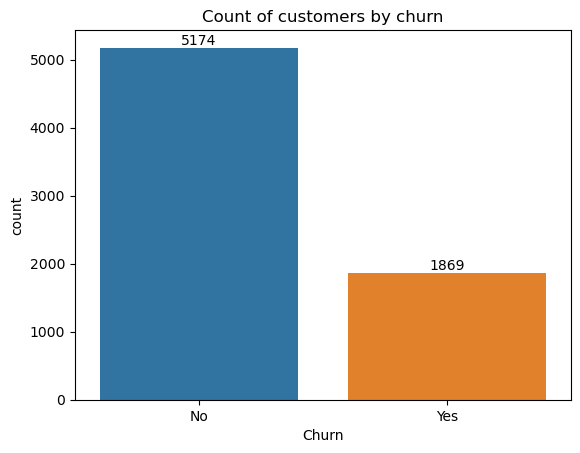

In [31]:
ax = sns.countplot(x = 'Churn' , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

In [ ]:
# Plotting the Number of customers churned in terms of percentage

In [21]:
gb=df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


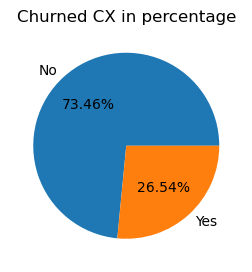

In [22]:
plt.figure(figsize = (3,4))
plt.pie(gb['Churn'], labels = gb.index , autopct = "%1.2f%%")
plt.title("Churned CX in percentage")
plt.show()

In [ ]:
# Plotting the churn by gender

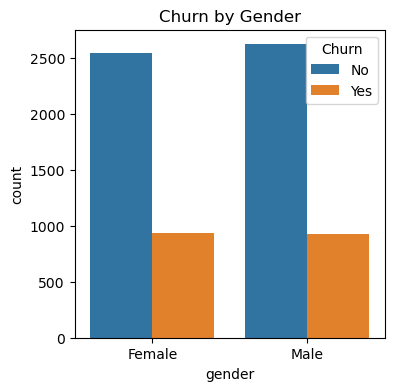

In [23]:
plt.figure(figsize = (4,4) )
sns.countplot(x = "gender" , data = df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

In [ ]:
# plotting the count of customers by senior citizen

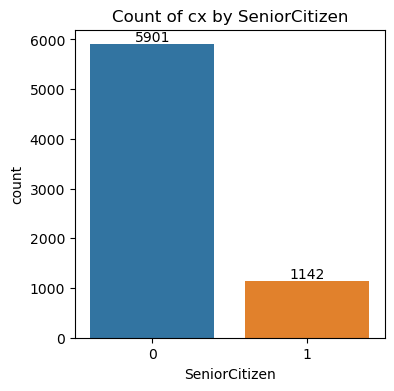

In [24]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen' , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of cx by SeniorCitizen")
plt.show()

In [ ]:
# plotting the churn rate by senior citizen status in percentage

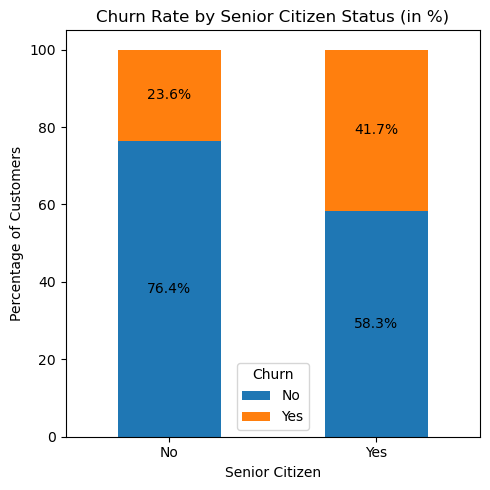

In [32]:
percent_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percent_df_percent = percent_df.div(percent_df.sum(axis=1), axis=0) * 100

ax = percent_df_percent.plot(kind='bar', stacked=True, figsize=(5,5), color=['#1f77b4','#ff7f0e'])

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

plt.title('Churn Rate by Senior Citizen Status (in %)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage of Customers')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [ ]:
#plotting the churn by tenure

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


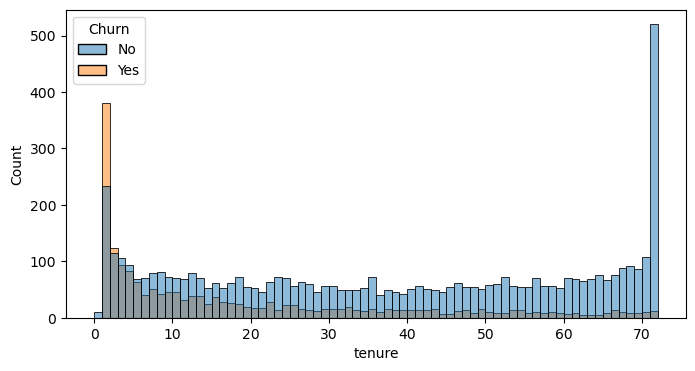

In [26]:
plt.figure(figsize = (8,4))
sns.histplot(x = "tenure" , data = df, bins=72, hue= "Churn" )
plt.show()

In [ ]:
#Plotting the count of customers by contract duration

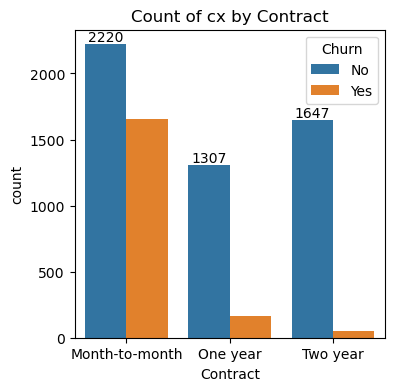

In [27]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract' , data = df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of cx by Contract")
plt.show()

In [ ]:
# Plotting subplots of churn happening due to or lack of  various value added services

In [28]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

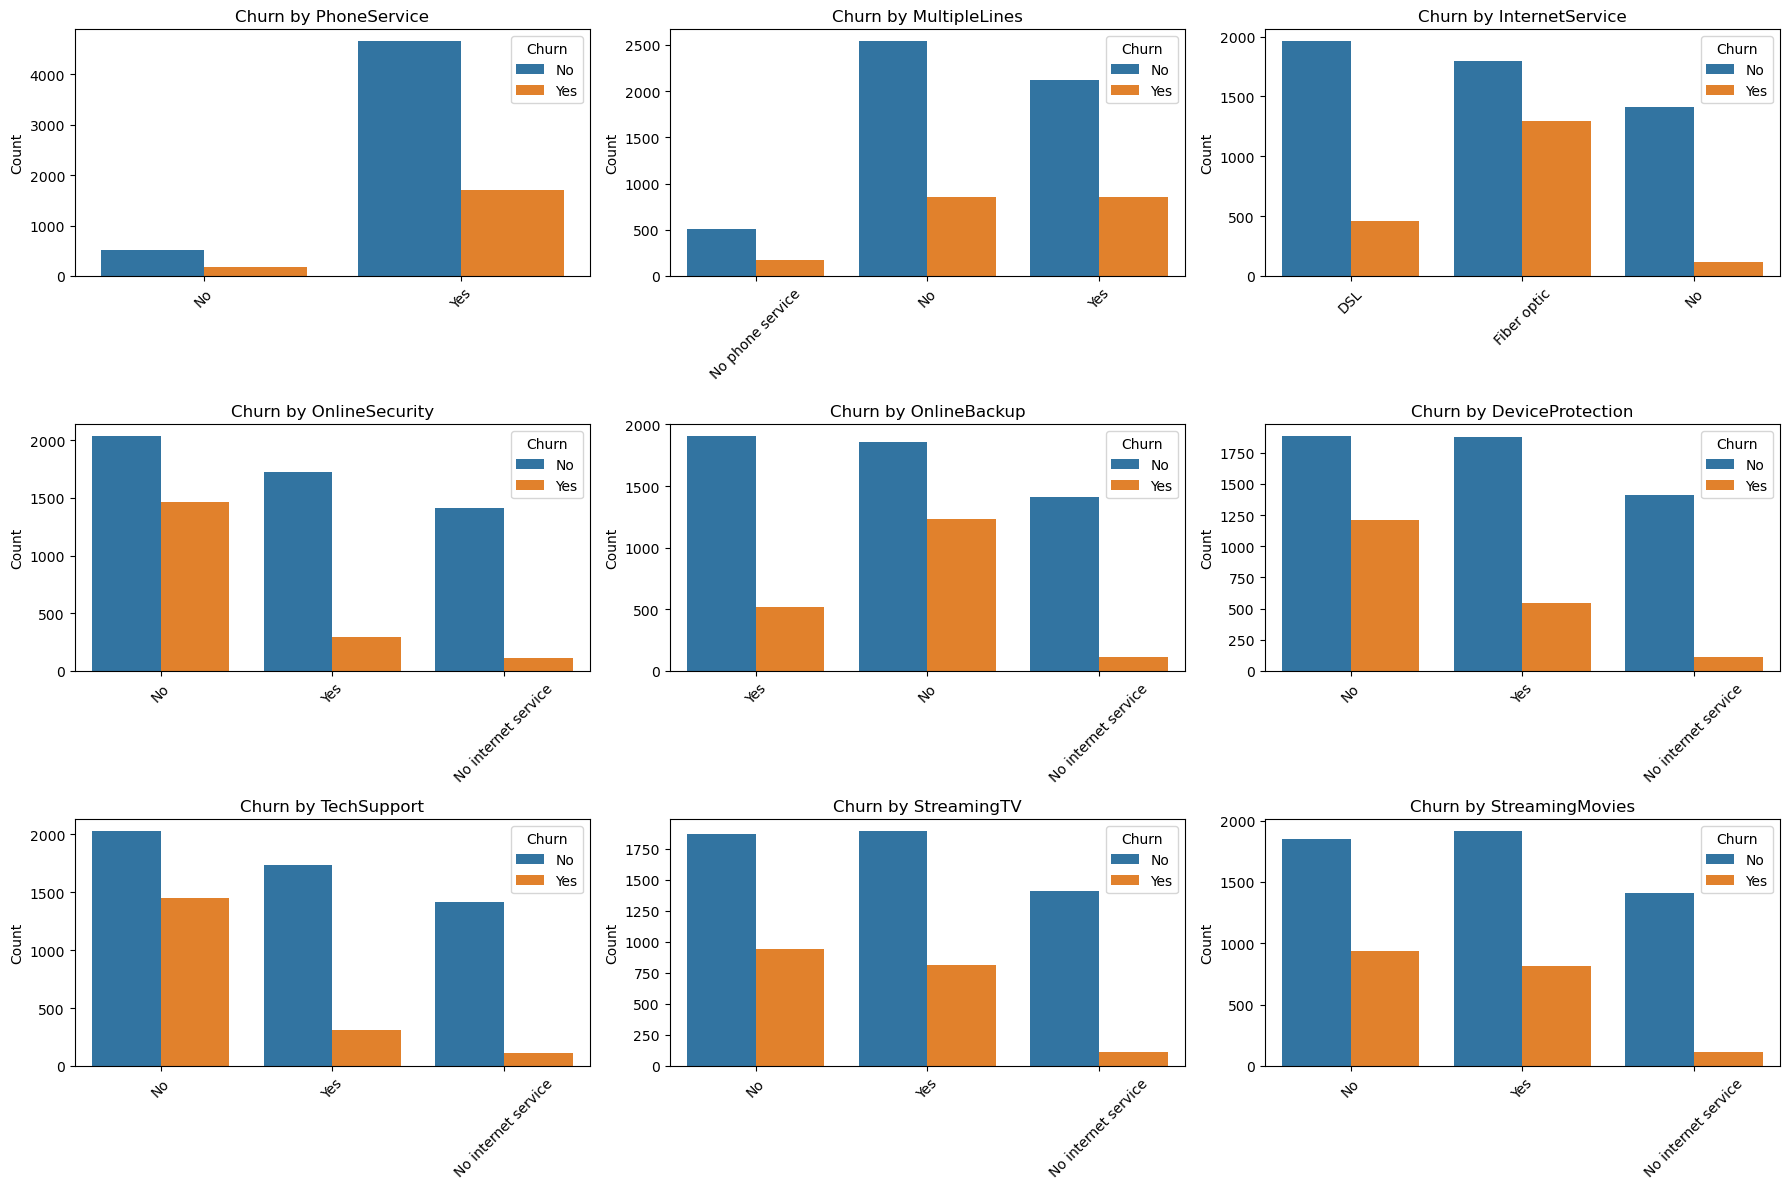

In [29]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

rows = 3
cols_per_row = 3

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

custom_palette = ['#1f77b4', '#ff7f0e']

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue="Churn", ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Plotting the churn of customers by payment method

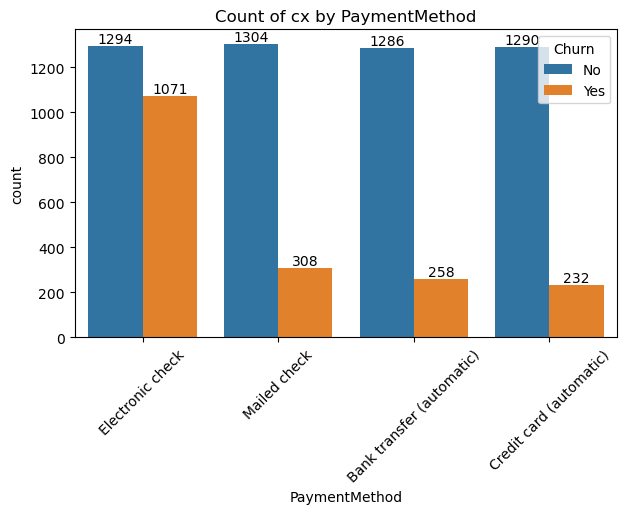

In [30]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x = 'PaymentMethod' , data = df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of cx by PaymentMethod")
plt.xticks(rotation=45)
plt.show()